In [1]:
!pip install tensorflow==2.0.0 -q

     |████████████████████████████████| 86.3MB 113kB/s 
     |████████████████████████████████| 450kB 68.4MB/s 
     |████████████████████████████████| 3.8MB 48.1MB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 2.0.0 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.


In [2]:
import tensorflow as tf
print(tf.__version__) 

2.0.0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import  Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Dropout

In [0]:
from tensorflow.keras.datasets import cifar10

In [5]:
(x_train, y_train) , (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [0]:
x_train, x_test = x_train/255.0 , x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()  

In [11]:
#Number of classes
K = len(set(y_train))
print(str(K))

10


In [12]:
x_train[0].shape

(32, 32, 3)

In [0]:
#Building the model
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), padding='same', strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), padding='same', strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), padding='same', strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)



In [0]:
#compiling and fitting
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [18]:
r = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=15)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 48s 963us/sample - loss: 1.4816 - accuracy: 0.4629 - val_loss: 1.3501 - val_accuracy: 0.5265
Epoch 2/15
50000/50000 [==============================] - 46s 926us/sample - loss: 1.1368 - accuracy: 0.5946 - val_loss: 1.0744 - val_accuracy: 0.6121
Epoch 3/15
50000/50000 [==============================] - 45s 904us/sample - loss: 0.9715 - accuracy: 0.6548 - val_loss: 0.9623 - val_accuracy: 0.6591
Epoch 4/15
50000/50000 [==============================] - 45s 905us/sample - loss: 0.8468 - accuracy: 0.7004 - val_loss: 0.9005 - val_accuracy: 0.6823
Epoch 5/15
50000/50000 [==============================] - 45s 894us/sample - loss: 0.7419 - accuracy: 0.7363 - val_loss: 0.9261 - val_accuracy: 0.6744
Epoch 6/15
50000/50000 [==============================] - 44s 889us/sample - loss: 0.6590 - accuracy: 0.7659 - val_loss: 0.8609 - val_accuracy: 0.7008
Epoch 7/15
50000/50000 [====================

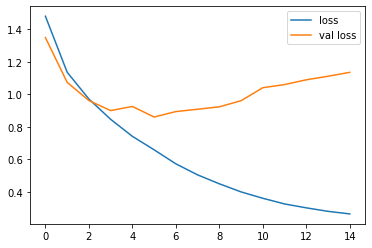

In [19]:
#plotting loss and accuracy
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()

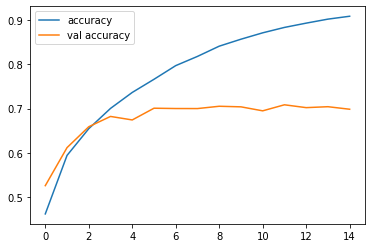

In [21]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label = 'val accuracy')
plt.legend()

In [0]:
p_test = model.predict(x_test).argmax(axis=1)

In [0]:
CM = confusion_matrix(y_test,p_test)

In [0]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True Label: cat Predicted Label: airplane')

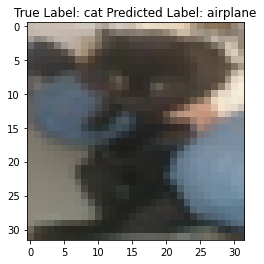

In [28]:
#Misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True Label: " + str(labels[y_test[i]] + " Predicted Label: ") + str(labels[p_test[i]]))